In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def quad_func_1(v, A):
    return (np.dot(v, A) * v).sum(axis=1)
    #return np.dot(v, np.dot(A, v))
    

In [3]:
A = np.array([[1, 2], [-2, 1]])
v = np.array([2, 1])

In [4]:
resolution = 1000
x_scale = 3
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 3
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)

In [5]:
xx, yy = np.meshgrid(x_range, y_range)

In [6]:
# リスト 7-1-(14)
from mpl_toolkits.mplot3d import Axes3D

def quad_func_1(v, A):
    return (np.dot(v, A) * v).sum(axis=1)
    #return np.dot(v, np.dot(A, v))
    

def show_3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(resolution, resolution)
    f = f.T
    ax.plot_surface(xx, yy, f, edgecolor=None, 
                    rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)

    
A = np.array([[6, 2], [2, 3]]) 

M = 2
K = 3
resolution = 50
x_scale = 1000
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 1000
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]


In [7]:
A

array([[6, 2],
       [2, 3]])

In [8]:
eigen_values, U = np.linalg.eig(A)

In [9]:
np.diag(eigen_values)

array([[7., 0.],
       [0., 2.]])

In [10]:
B = np.dot(np.dot(U, np.diag(np.array([-7, 2]))), U.T)

In [11]:
np.dot(np.dot(U, np.diag(eigen_values)), U.T)

array([[6., 2.],
       [2., 3.]])

In [12]:
import numpy as np 

In [13]:
resolution = 50
x_scale = 1000
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 1000
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]



In [14]:
x.shape

(2500, 2)

In [15]:
resolution = 50
x_scale = 1000
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 1000
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]


In [16]:
x.shape

(2500, 2)

In [17]:
radius = 1000
center_point = np.zeros(2)
meshgrid_mask = np.zeros(x.shape[0]).astype(bool)
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point)<radius):
        meshgrid_mask[i] = np.ones(1).astype(bool)

In [18]:
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point))<radius:
        meshgrid_mask[i] = np.ones(1).astype(bool)

In [19]:
x[np.where(meshgrid_mask==True)]

array([[-265.30612245, -959.18367347],
       [-224.48979592, -959.18367347],
       [-183.67346939, -959.18367347],
       ...,
       [ 183.67346939,  959.18367347],
       [ 224.48979592,  959.18367347],
       [ 265.30612245,  959.18367347]])

In [20]:
np.unique(meshgrid_mask)

array([False,  True])

In [21]:
x

array([[-1000.        , -1000.        ],
       [ -959.18367347, -1000.        ],
       [ -918.36734694, -1000.        ],
       ...,
       [  918.36734694,  1000.        ],
       [  959.18367347,  1000.        ],
       [ 1000.        ,  1000.        ]])

In [22]:
indexes  = np.where (meshgrid_mask ==True)[0]

In [23]:
import matplotlib.pyplot as plt

In [24]:
xx.reshape(-1, 1)[indexes] 

array([[-265.30612245],
       [-224.48979592],
       [-183.67346939],
       ...,
       [ 183.67346939],
       [ 224.48979592],
       [ 265.30612245]])

<IPython.core.display.Javascript object>


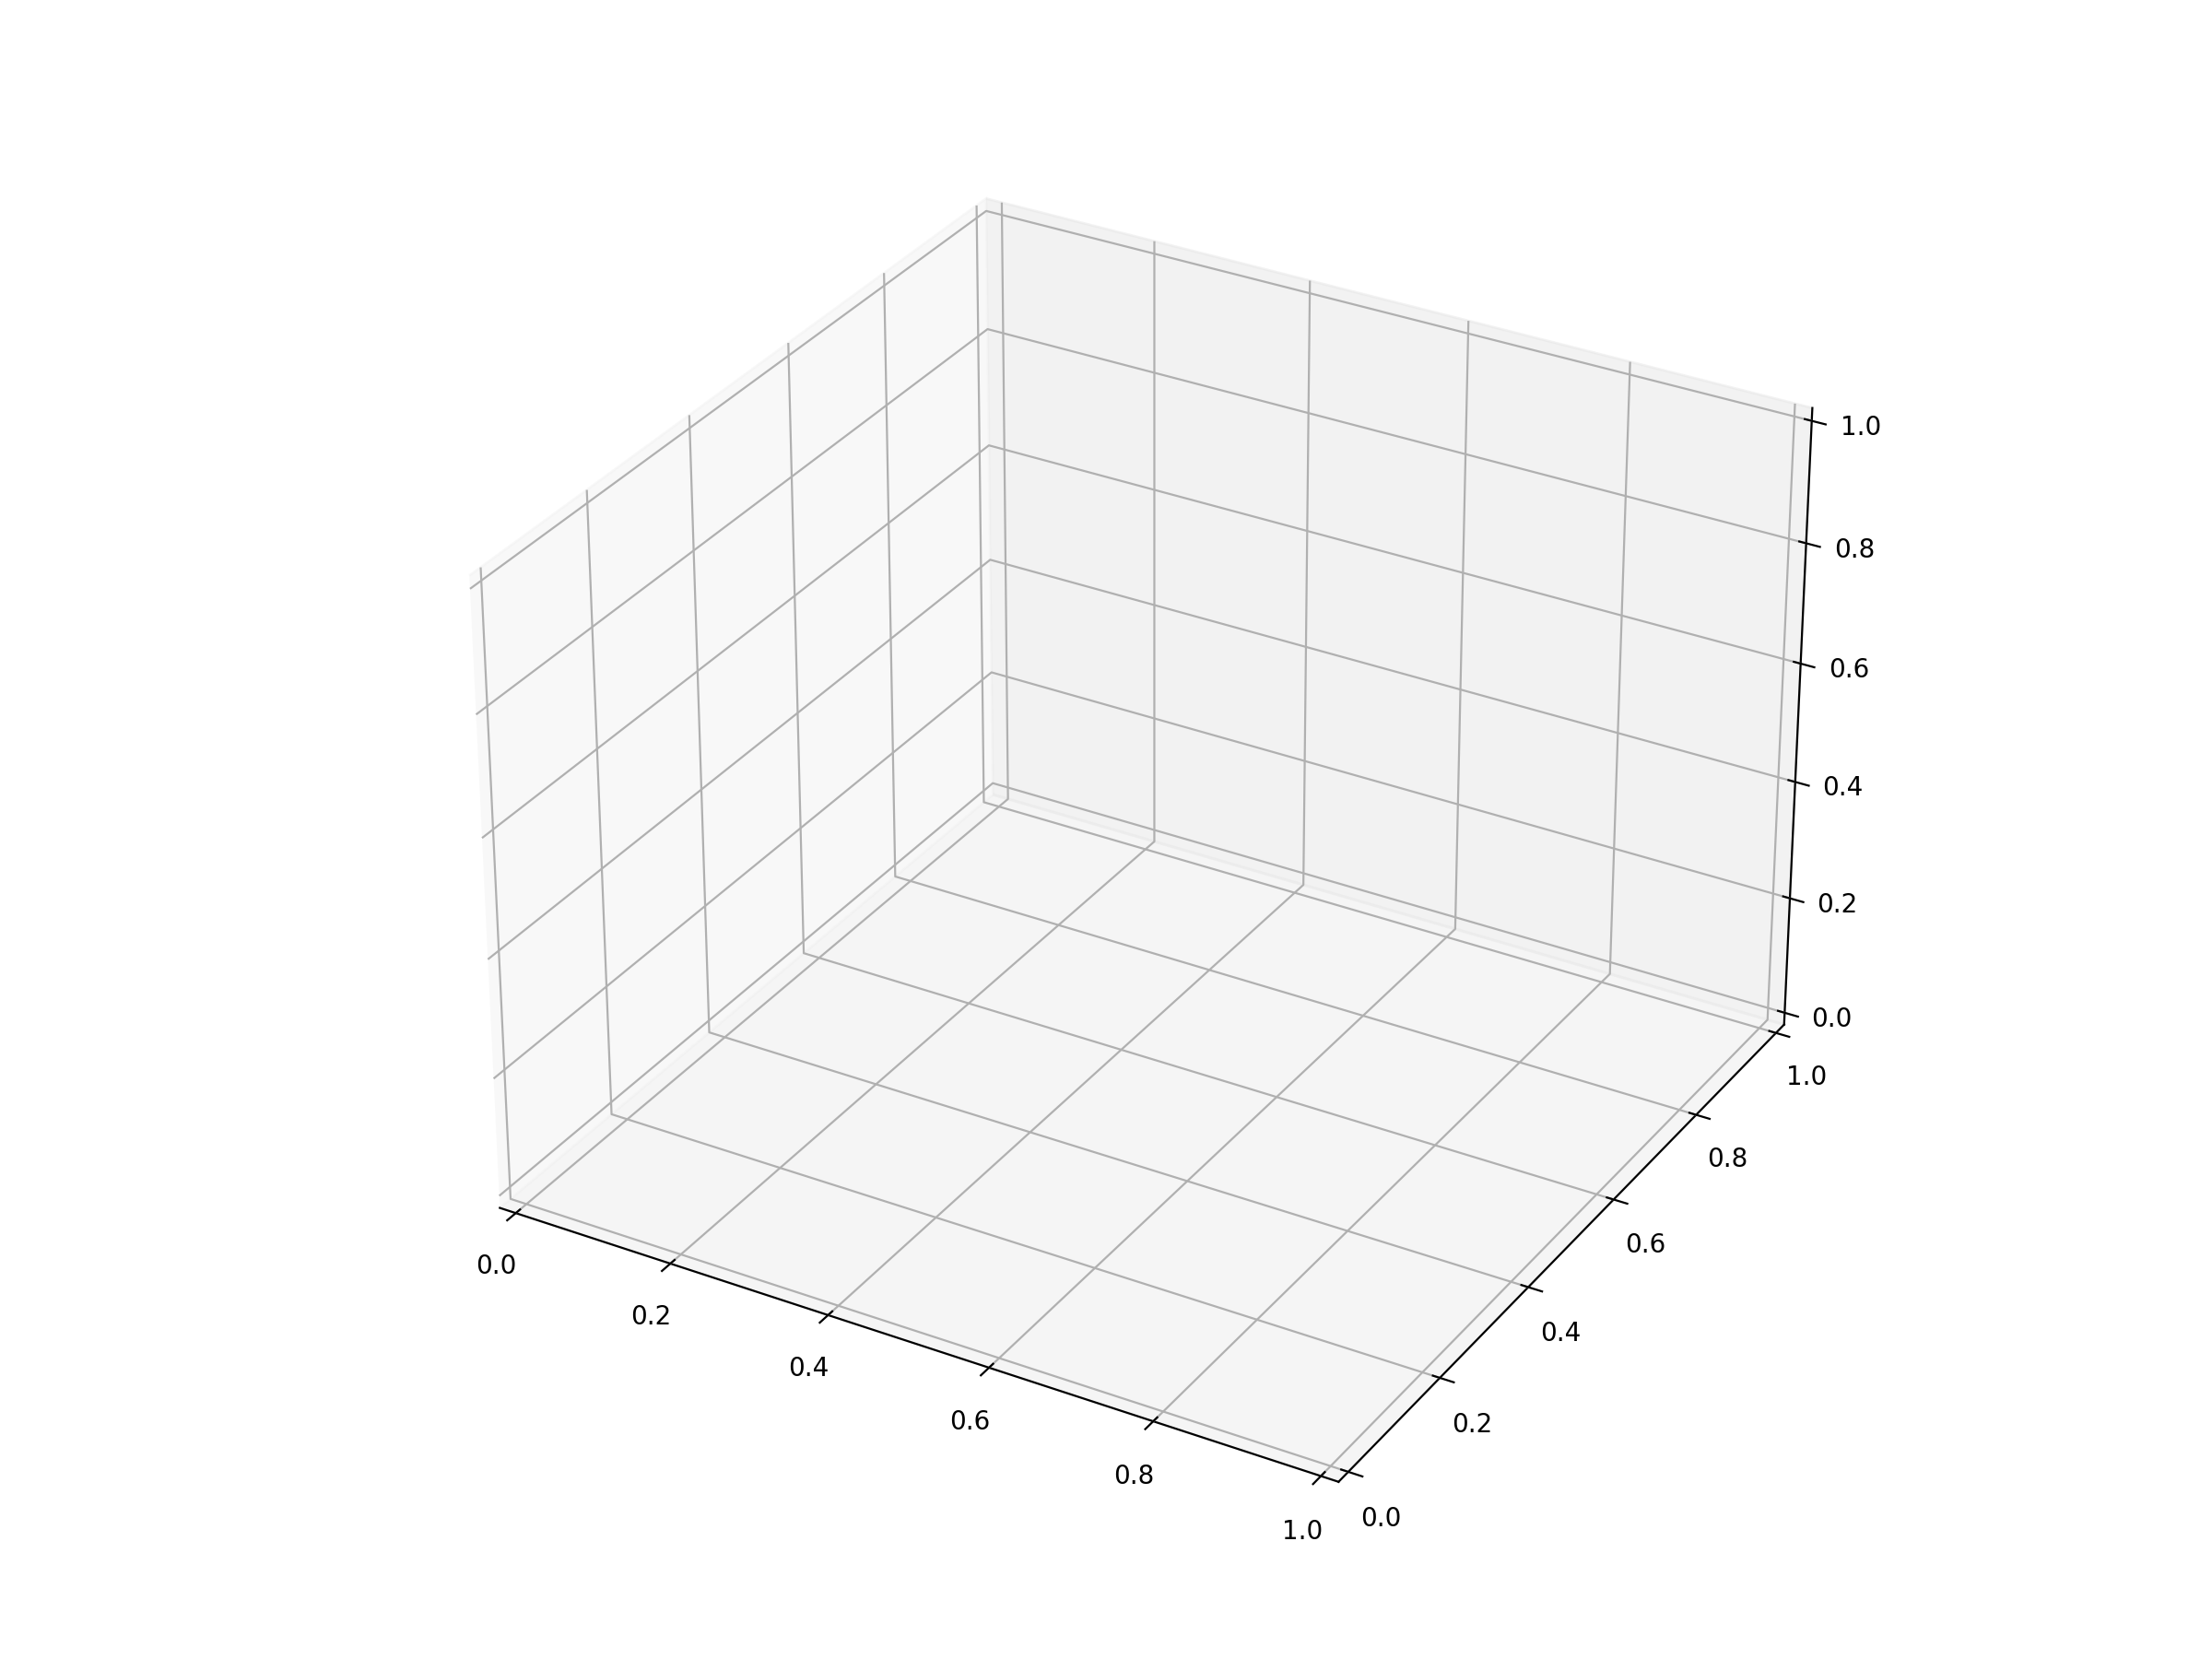

In [25]:
%matplotlib notebook

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

v_reduced = quad_func_1(x, A)[indexes]
xx_reduced = xx.reshape(-1, 1)[indexes] 
yy_reduced = yy.reshape(-1, 1)[indexes] 



In [26]:
v_reduced.shape, xx_reduced.shape, yy_reduced.shape

((1876,), (1876, 1), (1876, 1))

In [27]:
ax = fig.add_subplot(1, 1, 1 , projection='3d')
show_3d(ax, v_reduced, xx_reduced, yy_reduced, [0, 1000], 'Fuck you.')

TypeError: show_3d() takes 4 positional arguments but 6 were given

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


In [29]:
meshgrid_mask.shape, x.shape

((2500,), (2500, 2))

In [30]:
# A function to mix blue and red colors. 
def blue_red_gradation(z, z_max, z_min):
    red = np.array([1.0, 0.0, 0.0])
    blue = np.array([0.0, 0.0, 1.0])
    z_center = (z_max + z_min) /  2
    combined_color_z =  max(0, z-z_center)/z_center*blue + abs(min(z-z_center, 0))/z_center*red
    return combined_color_z[np.newaxis, ...]


In [31]:
radius = 50
center_point = np.zeros(2)
meshgrid_mask = np.zeros(x.shape[0]).astype(bool)
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point)<radius):
        meshgrid_mask[i] = np.ones(1).astype(bool)

In [73]:
from matplotlib import cm


In [148]:
# リスト 7-1-(14)
from mpl_toolkits.mplot3d import Axes3D

def quad_func_1(v, A):
    return (np.dot(v, A) * v).sum(axis=1)
    #return np.dot(v, np.dot(A, v))
    

def show_3d_scatter(ax, xx, yy, v, z_max, z_min, title_str):
    f = v.copy()
    #f = f.reshape(resolution, resolution)
    #f = f.T
    xx = xx.reshape(-1, 1)
    yy = yy.reshape(-1, 1)
    
    print("z_max, z_min ")
    print(z_max, z_min)
    
    for i in range(len(f)):
        #print(f[i])
        if(f[i] is None):
            continue
        #print(blue_red_gradation(f[i], z_max, z_min))
        #ax.scatter(xx[i], yy[i], f[i], c=blue_red_gradation(f[i], z_max, z_min), alpha=0.5)
        
    ax.scatter(xx, yy, f,c=f,   alpha=0.9, cmap=cm.coolwarm, s=5)
    ax.view_init(30, 110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)
    
# A function to mix blue and red colors. 
def blue_red_gradation(z, z_max, z_min):
    red = np.array([1.0, 0.0, 0.0])
    blue = np.array([0.0, 0.0, 1.0])
    z_center = (z_max + z_min) /  2
    combined_color_z =  max(0, z-z_center)/z_center*blue + abs(min(z-z_center, 0))/z_center*red
    return combined_color_z[np.newaxis, ...]


In [149]:
np.where(f != np.nan)[0].shape

(10000,)

In [150]:
np.unique(f)

array([6.93806754e+00, 1.34680135e+01, 3.14253648e+01, ...,
       1.28873788e+05, 1.29833690e+05, 1.32000000e+05])

In [164]:
resolution = 100
x_scale = 100
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 100
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]


In [169]:
radius = 100
center_point = np.zeros(2)
meshgrid_mask = np.zeros(x.shape[0]).astype(bool)
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point)<radius):
        meshgrid_mask[i] = np.ones(1).astype(bool)

In [170]:
f.max()

nan

z_max, z_min 
132000.0 6.938067544128153


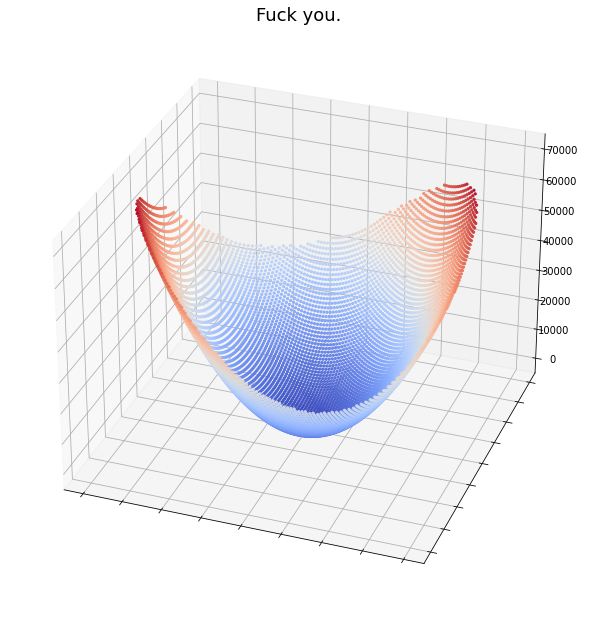

In [171]:

B = np.dot(np.dot(U, np.diag(np.array([7, 3]))), U.T)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

f = quad_func_1(x, B)
#z_max, z_min = f[np.where(meshgrid_mask == True)[0]].max(), f[np.where(meshgrid_mask == True)[0]].min()
f[np.where(meshgrid_mask == False)[0]] = np.nan


ax = fig.add_subplot(1, 1, 1 , projection='3d')
show_3d_scatter(ax,xx, yy, f, z_max, z_min,  'Fuck you.')


z_max, z_min 
132000.0 6.938067544128153


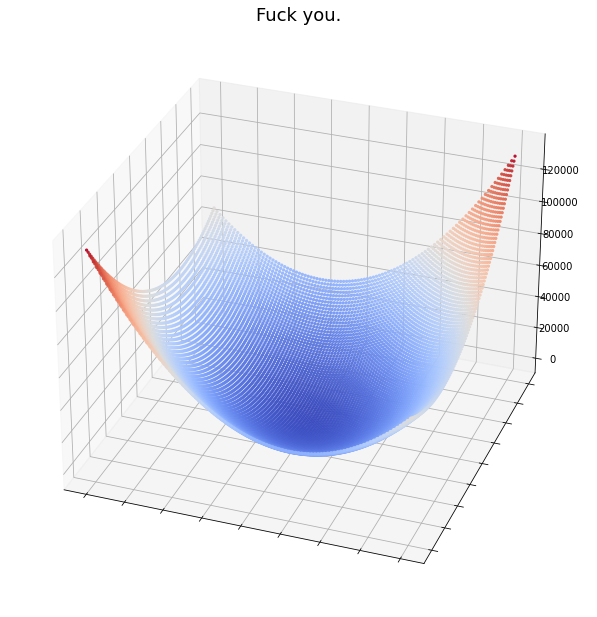

In [157]:

B = np.dot(np.dot(U, np.diag(np.array([7, 3]))), U.T)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

f = quad_func_1(x, B)
#z_max, z_min = f[np.where(meshgrid_mask == True)[0]].max(), f[np.where(meshgrid_mask == True)[0]].min()
f[np.where(meshgrid_mask == False)[0]] = np.nan


ax = fig.add_subplot(1, 1, 1 , projection='3d')
show_3d_scatter(ax,xx, yy, f, z_max, z_min,  'Fuck you.')


In [147]:
ax

<Axes3DSubplot:title={'center':'Fuck you.'}>

In [76]:
resolution = 25
x_scale = 100
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 100
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]


<IPython.core.display.Javascript object>


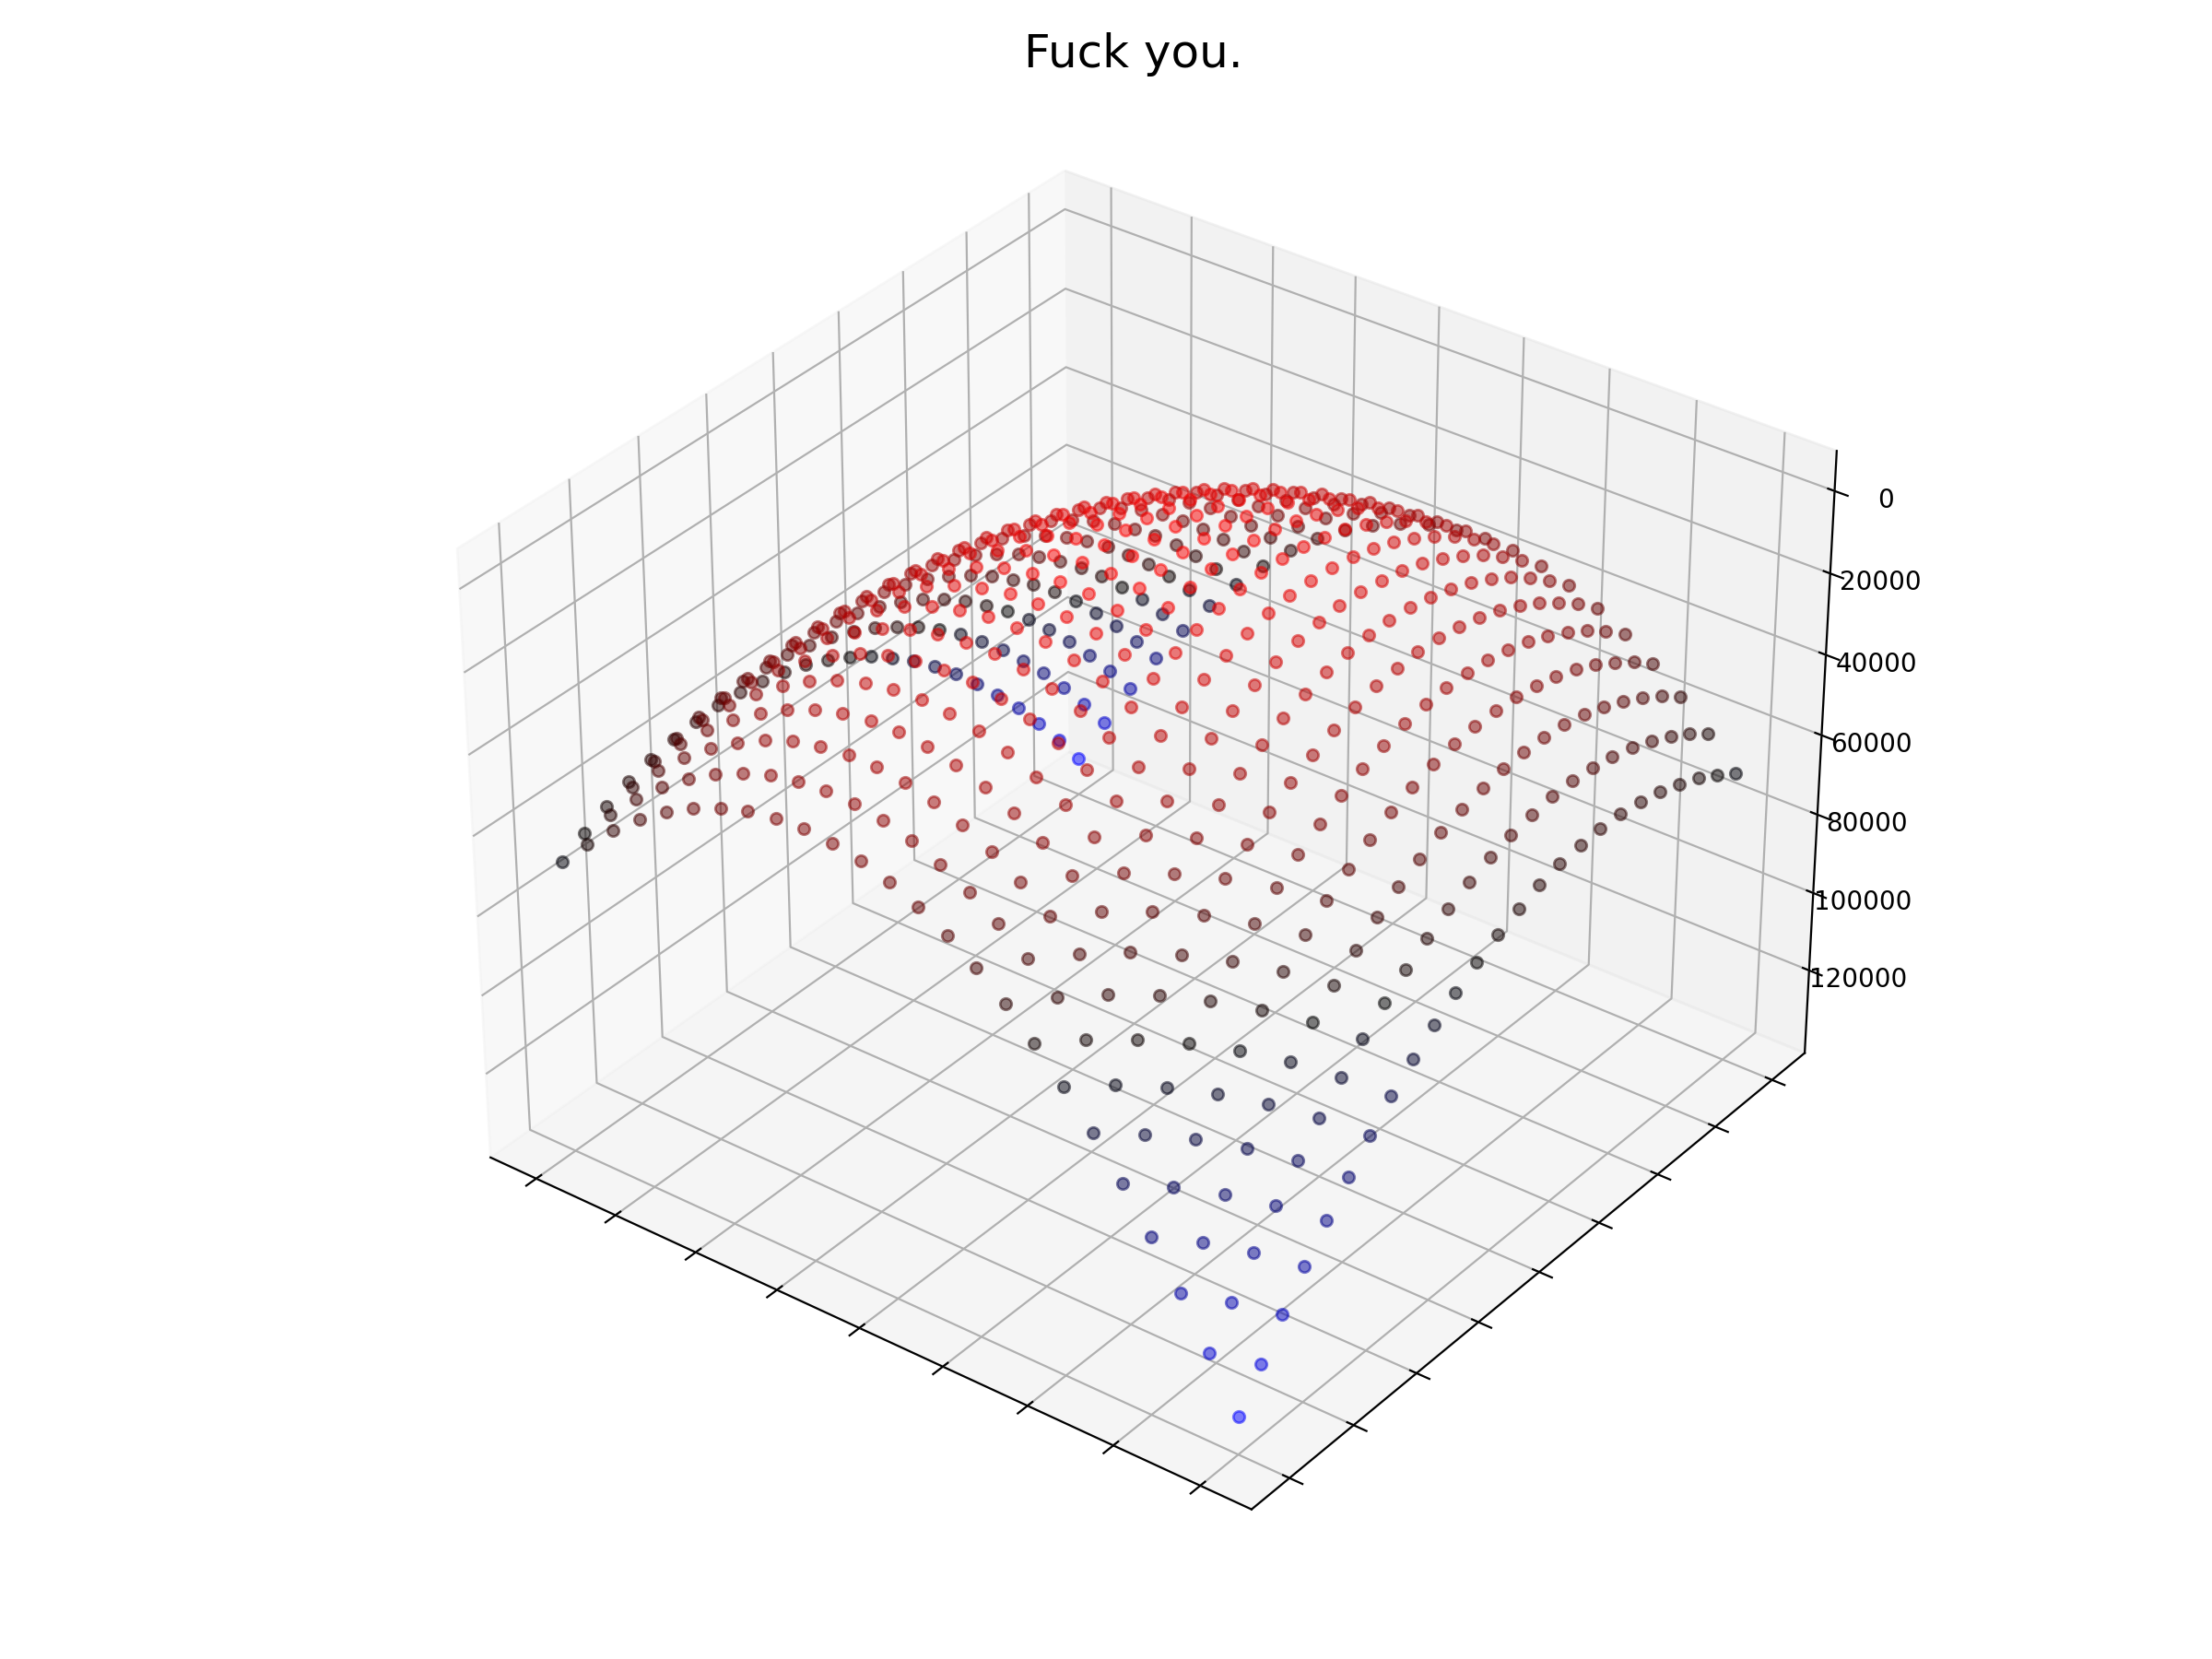

132000.0
[[0. 0. 1.]]
119430.55555555556
[[0.         0.         0.80955387]]
107722.22222222222
[[0.         0.         0.63215488]]
96874.99999999999
[[0.         0.         0.46780303]]
86888.88888888888
[[0.         0.         0.31649832]]
77763.88888888888
[[0.         0.         0.17824074]]
69500.0
[[0.        0.        0.0530303]]
62097.22222222222
[[0.059133 0.       0.      ]]
55555.55555555555
[[0.15824916 0.         0.        ]]
49875.0
[[0.24431818 0.         0.        ]]
45055.55555555555
[[0.31734007 0.         0.        ]]
41097.22222222222
[[0.37731481 0.         0.        ]]
38000.0
[[0.42424242 0.         0.        ]]
35763.88888888888
[[0.4581229 0.        0.       ]]
34388.88888888888
[[0.47895623 0.         0.        ]]
33874.99999999999
[[0.48674242 0.         0.        ]]
34222.22222222222
[[0.48148148 0.         0.        ]]
35430.55555555556
[[0.4631734 0.        0.       ]]
37500.0
[[0.43181818 0.         0.        ]]
40430.555555555555
[[0.38741582 0.       

76888.88888888888
[[0.         0.         0.16498316]]
66097.22222222222
[[0.         0.         0.00147306]]
56166.666666666664
[[0.1489899 0.        0.       ]]
47097.22222222221
[[0.28640572 0.         0.        ]]
38888.88888888887
[[0.41077441 0.         0.        ]]
31541.666666666657
[[0.52209596 0.         0.        ]]
25055.55555555555
[[0.62037037 0.         0.        ]]
19430.55555555555
[[0.70559764 0.         0.        ]]
14666.666666666662
[[0.77777778 0.         0.        ]]
10763.888888888887
[[0.83691077 0.         0.        ]]
7722.222222222217
[[0.88299663 0.         0.        ]]
5541.666666666664
[[0.91603535 0.         0.        ]]
4222.222222222221
[[0.93602694 0.         0.        ]]
3763.888888888888
[[0.94297138 0.         0.        ]]
4166.666666666666
[[0.93686869 0.         0.        ]]
5430.555555555557
[[0.91771886 0.         0.        ]]
7555.555555555558
[[0.88552189 0.         0.        ]]
10541.666666666673
[[0.84027778 0.         0.        ]]
14388.88

25263.88888888888
[[0.6172138 0.        0.       ]]
19916.666666666664
[[0.69823232 0.         0.        ]]
15430.555555555555
[[0.7662037 0.        0.       ]]
11805.555555555558
[[0.82112795 0.         0.        ]]
9041.666666666668
[[0.86300505 0.         0.        ]]
7138.888888888892
[[0.89183502 0.         0.        ]]
6097.222222222226
[[0.90761785 0.         0.        ]]
5916.666666666673
[[0.91035354 0.         0.        ]]
6597.222222222228
[[0.90004209 0.         0.        ]]
8138.888888888897
[[0.8766835 0.        0.       ]]
10541.666666666675
[[0.84027778 0.         0.        ]]
13805.555555555567
[[0.79082492 0.         0.        ]]
17930.55555555557
[[0.72832492 0.         0.        ]]
22916.666666666686
[[0.65277778 0.         0.        ]]
28763.888888888894
[[0.5641835 0.        0.       ]]
35472.22222222223
[[0.46254209 0.         0.        ]]
43041.66666666669
[[0.34785354 0.         0.        ]]
51472.22222222223
[[0.22011785 0.         0.        ]]
60763.888888888

79041.6666666667
[[0.         0.         0.19760101]]
88805.55555555556
[[0.         0.         0.34553872]]
99430.55555555558
[[0.         0.         0.50652357]]
110916.6666666667
[[0.         0.         0.68055556]]
123263.88888888889
[[0.         0.         0.86763468]]
67999.99999999999
[[0.         0.         0.03030303]]
60763.888888888876
[[0.07933502 0.         0.        ]]
54388.88888888888
[[0.17592593 0.         0.        ]]
48875.0
[[0.2594697 0.        0.       ]]
44222.222222222204
[[0.32996633 0.         0.        ]]
40430.55555555555
[[0.38741582 0.         0.        ]]
37500.0
[[0.43181818 0.         0.        ]]
35430.555555555555
[[0.4631734 0.        0.       ]]
34222.22222222222
[[0.48148148 0.         0.        ]]
33875.0
[[0.48674242 0.         0.        ]]
34388.88888888888
[[0.47895623 0.         0.        ]]
35763.88888888888
[[0.4581229 0.        0.       ]]
38000.0
[[0.42424242 0.         0.        ]]
41097.22222222222
[[0.37731481 0.         0.        ]]
4

In [77]:
%matplotlib notebook

B = np.dot(np.dot(U, np.diag(np.array([7, 3]))), U.T)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

f = quad_func_1(x, B)
#f[np.where(meshgrid_mask == False)[0]] = np.nan

ax = fig.add_subplot(1, 1, 1 , projection='3d')
show_3d_scatter(ax,xx, yy, f,  'Fuck you.')


In [35]:
np.unique(f)

array([ 6.93806754, 13.46801347, 31.42536476, ...,         nan,
               nan,         nan])

In [93]:
import PyQt5

In [94]:
%matplotlib notebook

<IPython.core.display.Javascript object>


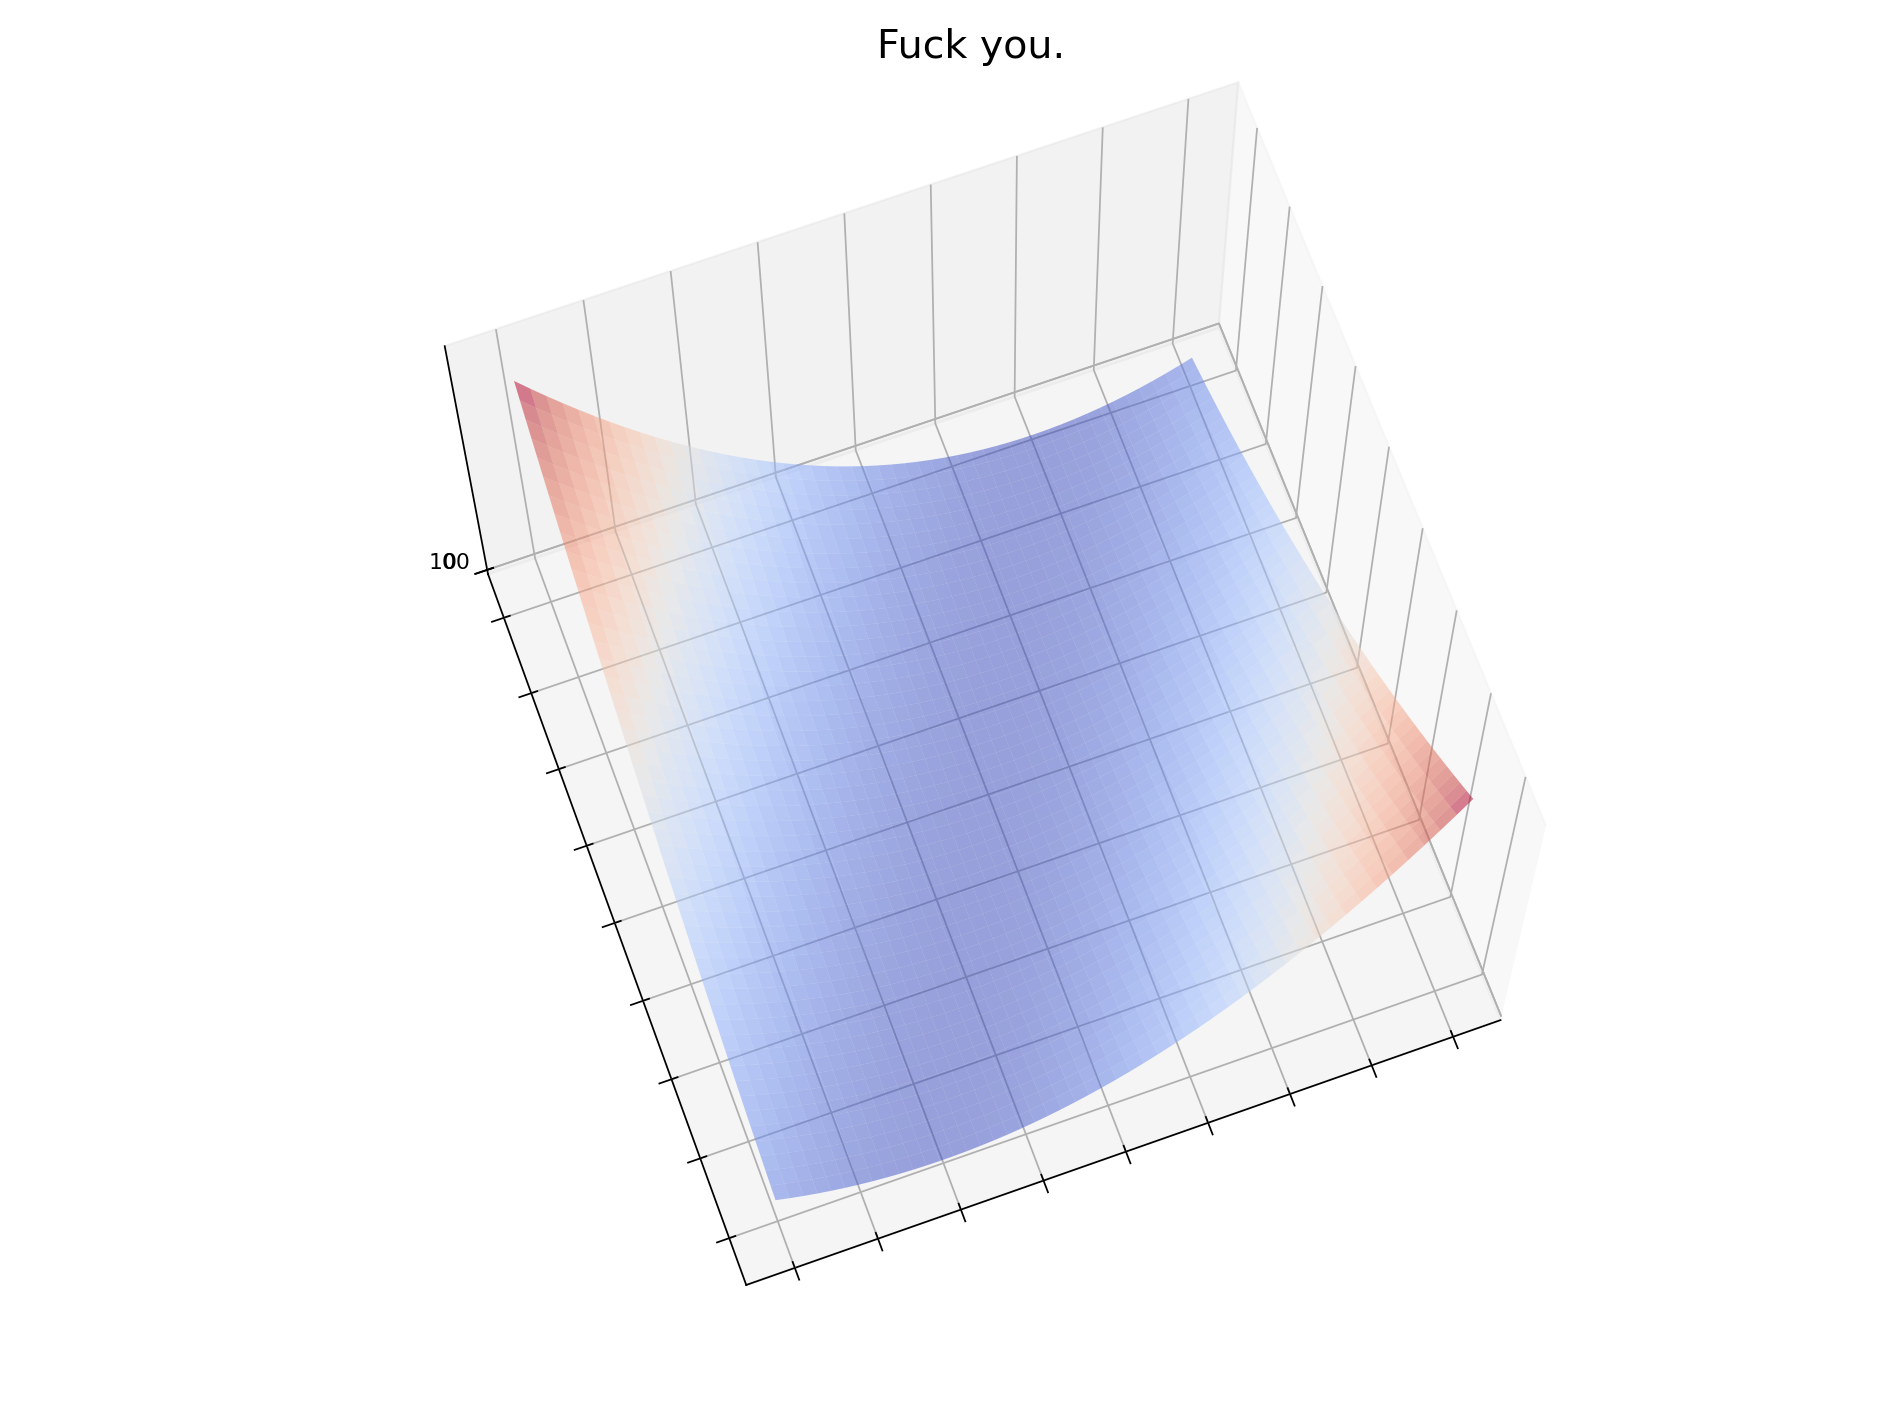

In [95]:
B = np.dot(np.dot(U, np.diag(np.array([0, 2]))), U.T)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)


ax = fig.add_subplot(1, 1, 1 , projection='3d')
show_3d(ax, quad_func_1(x, B), [0, 100], 'Fuck you.')


<IPython.core.display.Javascript object>


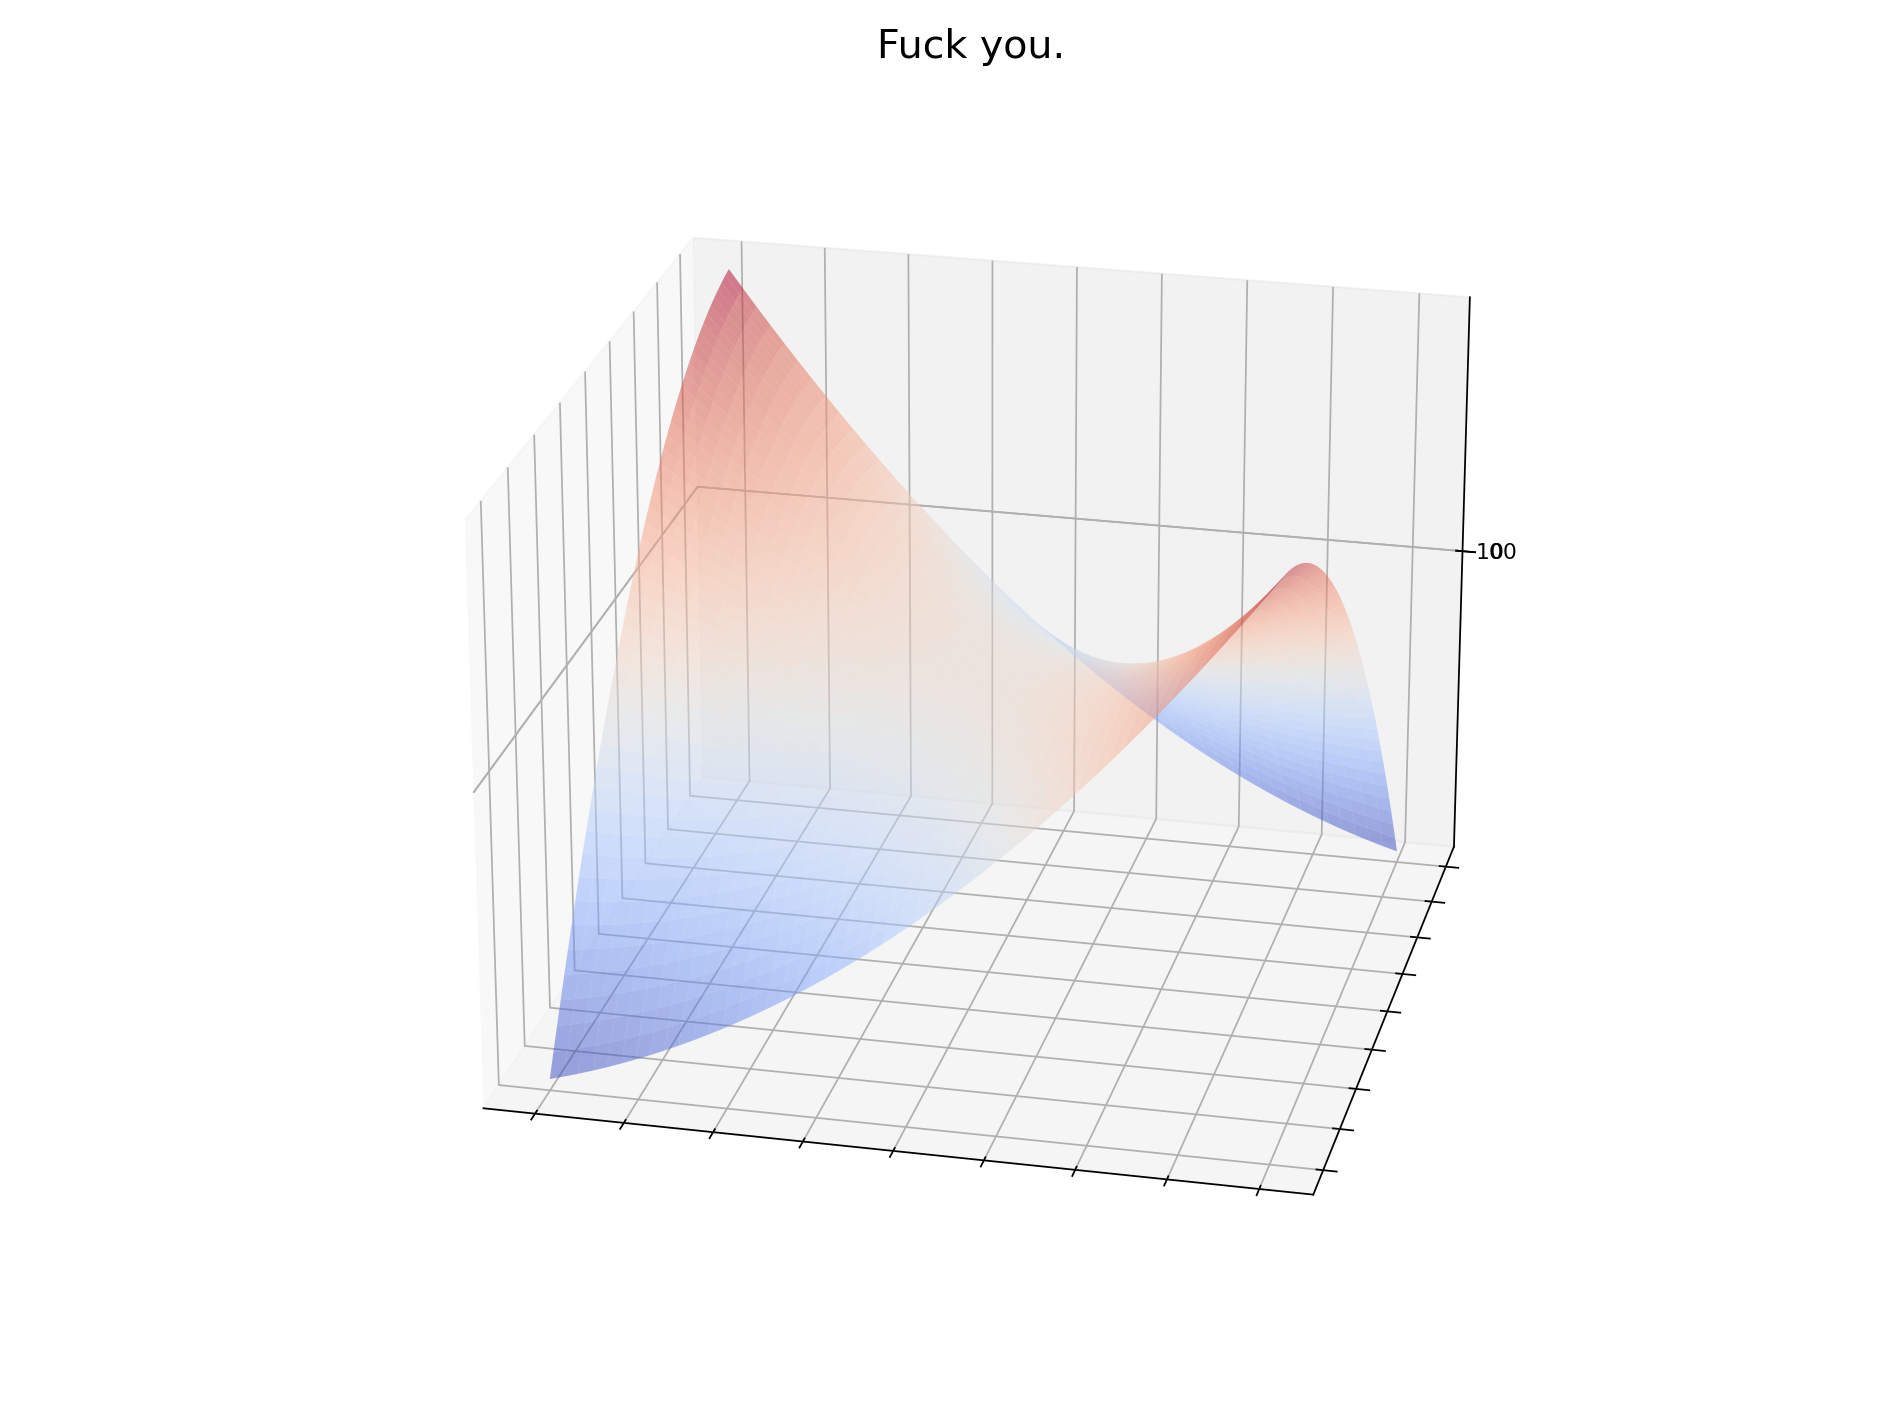

In [216]:
%matplotlib notebook
B = np.dot(np.dot(U, np.diag(np.array([-7,6]))), U.T)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)


ax = fig.add_subplot(1, 1, 1 , projection='3d')
#show_3d(ax, quad_func_1(x, np.diag(np.array([-7, 6]))), [0, 100], 'Fuck you.')
show_3d(ax, quad_func_1(x, B), [0, 100], 'Fuck you.')


<IPython.core.display.Javascript object>


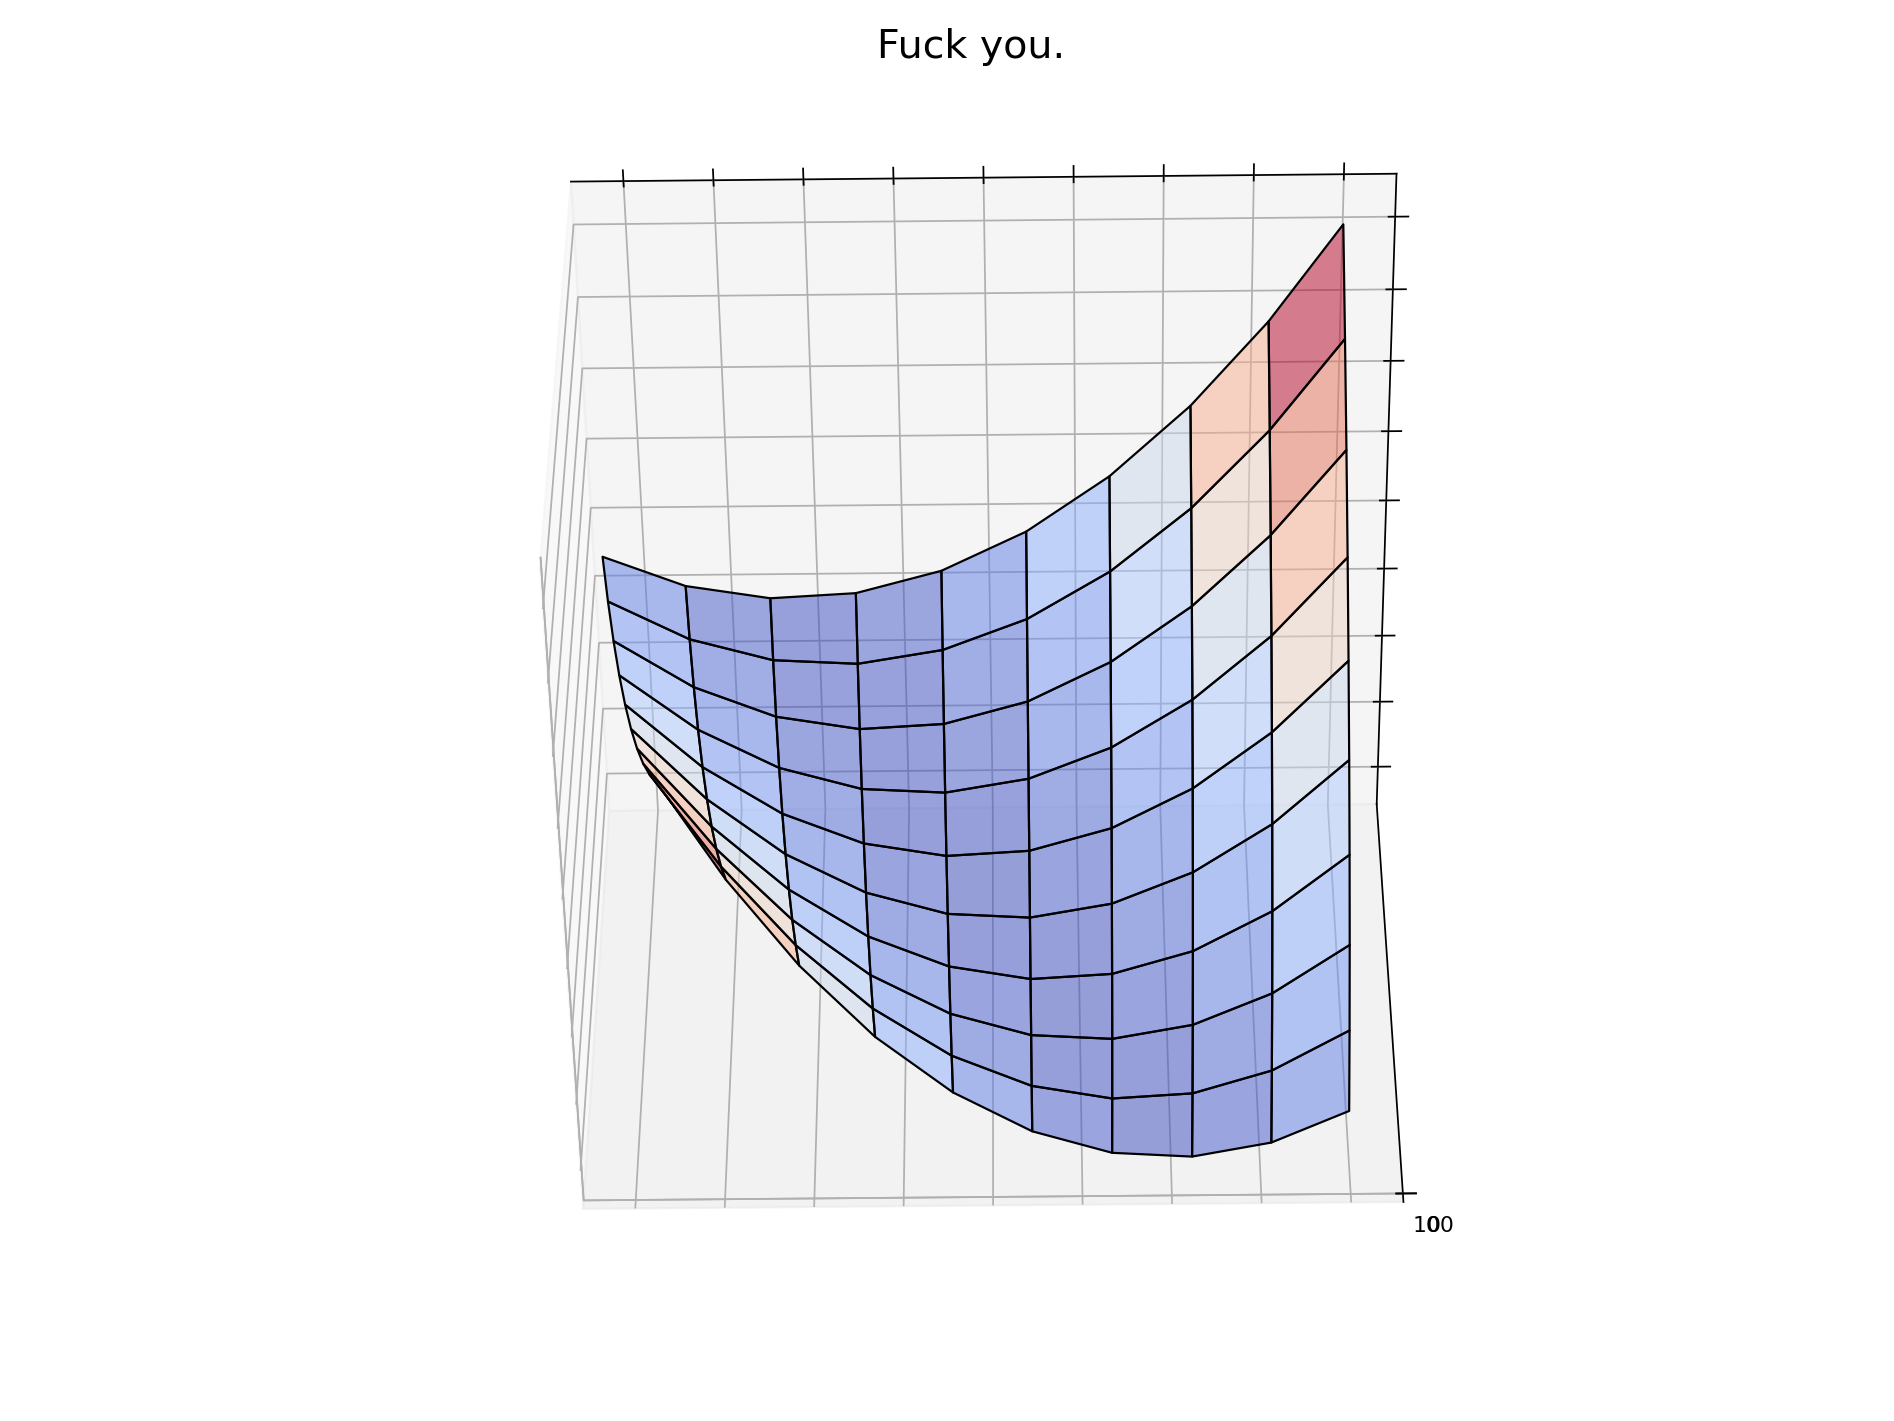

In [168]:
%matplotlib notebook
B = np.dot(np.dot(U, np.diag(np.array([0,6]))), U.T)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)


ax = fig.add_subplot(1, 1, 1 , projection='3d')
#show_3d(ax, quad_func_1(x, np.diag(np.array([-7, 6]))), [0, 100], 'Fuck you.')
show_3d(ax, quad_func_1(x, B), [0, 100], 'Fuck you.')


In [156]:
np.diag(np.array([-7, 6]))

array([[-7,  0],
       [ 0,  6]])

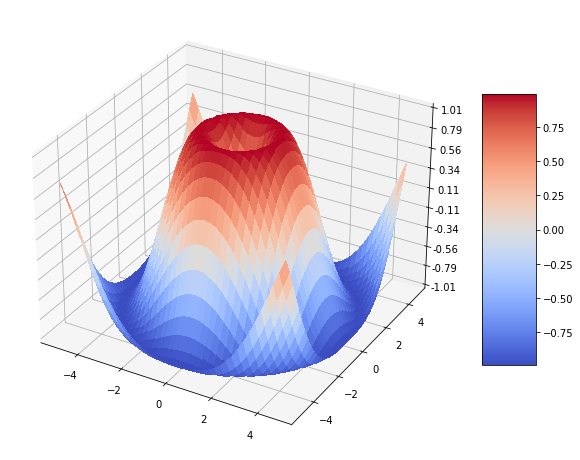

In [125]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [71]:
v = np.c_[np.arange(10), np.arange(10)]

In [72]:
v

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [73]:
A = np.array([[6, 2], [2, 3]])


In [75]:
quad_func_1(v, A)

array([   0,   13,   52,  117,  208,  325,  468,  637,  832, 1053])

In [9]:
x.shape

(1000000, 2)

In [32]:
quad_func_1(x, A)

(1000000,)

In [12]:
v = np.arange(3*2).reshape(3, 2)

In [16]:
v

array([[0, 1],
       [2, 3],
       [4, 5]])

In [17]:
A

array([[ 1,  2],
       [-2,  1]])

In [15]:
np.dot(v, A)

array([[-2,  1],
       [-4,  7],
       [-6, 13]])

In [29]:
np.dot(v, A) * v

array([[  0,   1],
       [ -8,  21],
       [-24,  65]])

In [28]:
(np.dot(v, A) * v).sum(axis=1)

array([ 1, 13, 41])

In [25]:
np.dot(np.dot(v, A) , v)

ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [37]:
fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)


ax = fig.add_subplot(1, 1, 1 , projection='3d')
show_3d(ax, quad_func_1(x, A), [0, 10], 'Fuck you.')


Error in callback <function flush_figures at 0x7fe7c96c7d08> (for post_execute):


KeyboardInterrupt: 

In [ ]:
for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))
    
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))
    